In [104]:
import pandas as pd
import numpy as np
import unidecode
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import os
import seaborn as sns

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['font.family'] = 'Liberation Serif'

In [58]:
def autolabel(rects):
#### funcion que realiza etiquetas en los BARPLOTs
    for rect in rects:
        height = rect.get_height() #### obtiene la altura de la barra
        ax.text(rect.get_x() + rect.get_width()/2. #### posiciona el label horizontalmente
                , height, #### posiciona el label verticalmente
                '%d' % int(height),
                ha='center',
                va='bottom',
                fontweight='bold',
                fontsize= 14)
def removeSpines(ax):
#### remuevo los bordes, labels y lineas 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.xaxis.set_ticks_position('none')

In [59]:
folder = os.getcwd()

#### Carga de datos

In [33]:
data_types_installs = { "created" : str, "application_id" : np.uint8, "ref_type" : 'category',"click_hash" : 'category', "attributed" : bool ,\
                "implicit": bool, "device_countrycode" : 'category',"device_brand" : 'category', "device_model" : 'category', \
                 "session_user_agent" : 'category', "user_agent": 'category',"event_uuid" : 'category', "kind" : str, "wifi" : bool, \
                "trans_id" : 'category', "ip_address" : 'category', "device_language" : 'category'
             }
data_types_auctions = { "auction_type_id" : 'category', "country" : 'category', "date" : str, "device_id" : 'category', \
                      "platform" : 'category', "ref_type_id" : 'category', "source_id" : 'category'}
data_types_events = {'ref_type':'category', 'event_id' : 'category', 'ref_hash': 'category', \
                'application_id':'category', 'attributed':bool, 'device_os':'category', 'device_os_version':'category',\
                'device_brand':'category','device_model':'category','device_city':'category', \
                'session_user_agent':'category', 'trans_id':'category', 'user_agent':'category',\
                'event_uuid':'category','carrier':'category','kind':'category','wifi':bool,\
                'connection_type':'category','ip_address':'category','device_language':'category',\
                'device_countrycode':'category'}

In [39]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494423 entries, 0 to 2494422
Data columns (total 22 columns):
date                  datetime64[ns]
event_id              category
ref_type              category
ref_hash              category
application_id        category
attributed            bool
device_countrycode    category
device_os_version     category
device_brand          category
device_model          category
device_city           category
session_user_agent    category
trans_id              category
user_agent            category
event_uuid            category
carrier               category
kind                  category
device_os             category
wifi                  object
connection_type       category
ip_address            category
device_language       category
dtypes: bool(1), category(19), datetime64[ns](1), object(1)
memory usage: 246.6+ MB


In [108]:
#events = pd.read_csv( folder + '/data/events.csv.gzip', parse_dates=['date'],infer_datetime_format=True,\
#                     compression='gzip',low_memory=False, dtype=data_types_events)
clicks = pd.read_csv( folder + '/data/clicks.csv.gzip', compression='gzip',low_memory=False)
#installs = pd.read_csv( folder + '/data/installs.csv.gzip',dtype=data_types_installs, compression='gzip',low_memory=False)
#auctions = pd.read_csv( folder + '/data/auctions.csv.gzip',dtype=data_types_auctions, compression='gzip',low_memory=False)
#target_c = pd.read_csv( folder + '/data/target_competencia.csv',low_memory=False)

#### Mirada preliminar

In [35]:
events.shape, clicks.shape, installs.shape, auctions.shape, target_c.shape

((2494423, 22), (26351, 20), (3412, 18), (19571319, 7), (235, 4))

In [36]:
clicks.columns

Index(['advertiser_id', 'action_id', 'source_id', 'created', 'country_code',
       'latitude', 'longitude', 'wifi_connection', 'carrier_id', 'trans_id',
       'os_minor', 'agent_device', 'os_major', 'specs_brand', 'brand',
       'timeToClick', 'touchX', 'touchY', 'ref_type', 'ref_hash'],
      dtype='object')

In [37]:
events.columns

Index(['date', 'event_id', 'ref_type', 'ref_hash', 'application_id',
       'attributed', 'device_countrycode', 'device_os_version', 'device_brand',
       'device_model', 'device_city', 'session_user_agent', 'trans_id',
       'user_agent', 'event_uuid', 'carrier', 'kind', 'device_os', 'wifi',
       'connection_type', 'ip_address', 'device_language'],
      dtype='object')

In [38]:
installs.columns

Index(['created', 'application_id', 'ref_type', 'ref_hash', 'click_hash',
       'attributed', 'implicit', 'device_countrycode', 'device_brand',
       'device_model', 'session_user_agent', 'user_agent', 'event_uuid',
       'kind', 'wifi', 'trans_id', 'ip_address', 'device_language'],
      dtype='object')

In [42]:
auctions.columns

Index(['auction_type_id', 'country', 'date', 'device_id', 'platform',
       'ref_type_id', 'source_id'],
      dtype='object')

In [43]:
clicks.dtypes

advertiser_id        int64
action_id          float64
source_id            int64
created             object
country_code         int64
latitude           float64
longitude          float64
wifi_connection       bool
carrier_id         float64
trans_id            object
os_minor           float64
agent_device       float64
os_major           float64
specs_brand          int64
brand              float64
timeToClick        float64
touchX             float64
touchY             float64
ref_type             int64
ref_hash             int64
dtype: object

In [44]:
auctions.dtypes

auction_type_id    float64
country              int64
date                object
device_id            int64
platform             int64
ref_type_id          int64
source_id            int64
dtype: object

In [45]:
events.dtypes

date                   object
event_id                int64
ref_type                int64
ref_hash                int64
application_id          int64
attributed               bool
device_countrycode      int64
device_os_version     float64
device_brand          float64
device_model          float64
device_city           float64
session_user_agent    float64
trans_id               object
user_agent            float64
event_uuid             object
carrier               float64
kind                  float64
device_os             float64
wifi                   object
connection_type        object
ip_address              int64
device_language       float64
dtype: object

In [46]:
installs.dtypes

created                object
application_id          int64
ref_type                int64
ref_hash                int64
click_hash            float64
attributed               bool
implicit                 bool
device_countrycode      int64
device_brand          float64
device_model          float64
session_user_agent     object
user_agent             object
event_uuid             object
kind                   object
wifi                   object
trans_id               object
ip_address              int64
device_language       float64
dtype: object

### Cantidad de Eventos por APP

In [56]:
toplot = events[['application_id','event_id']].groupby('application_id').agg('count').reset_index()
toplot = toplot.sort_values(by = 'event_id',ascending = False)[0:15]
toplot.columns = ['application_id','events_count']

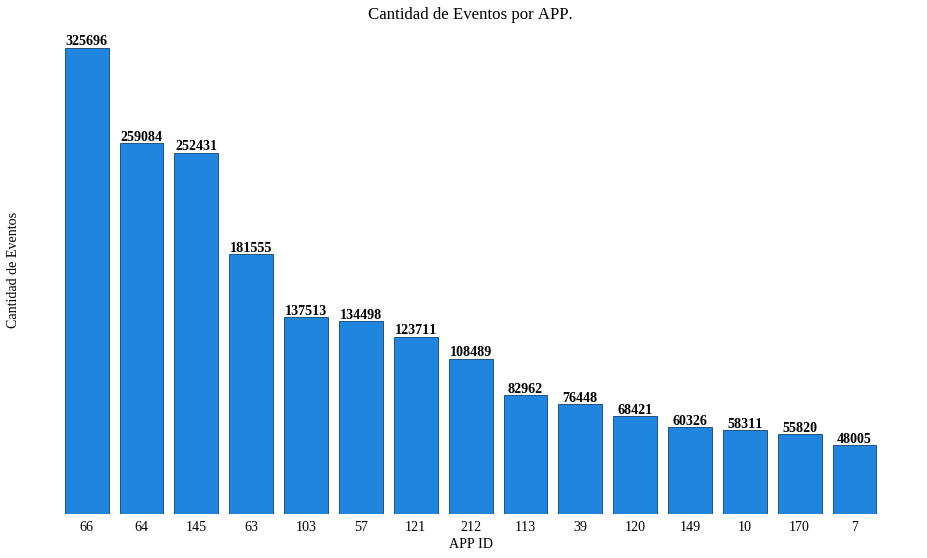

In [60]:
tox=toplot.application_id.tolist()
height = toplot.events_count.tolist()
fig, ax = plt.subplots(figsize=(16,9))
rects1 = ax.bar(tox, height , color='#1F85DE',edgecolor='#265680', align='center')

################### visualizacion de estilo minimalista ######################
##############################################################################
#### titulos
ax.set_title('Cantidad de Eventos por APP.')
ax.set_ylabel('Cantidad de Eventos')
ax.set_xlabel('APP ID')
ax.set_yticks([])
#####################################################################################
autolabel(rects1)
removeSpines(ax)
### aplico la funcion autolabel para poner la cantidad sobre cada barra
plt.show()

#### Cantidades de ocurrencias de cada evento

In [61]:
toplot = events['event_id'].value_counts().reset_index()[0:15]
toplot.columns = ['event_id','events_count']

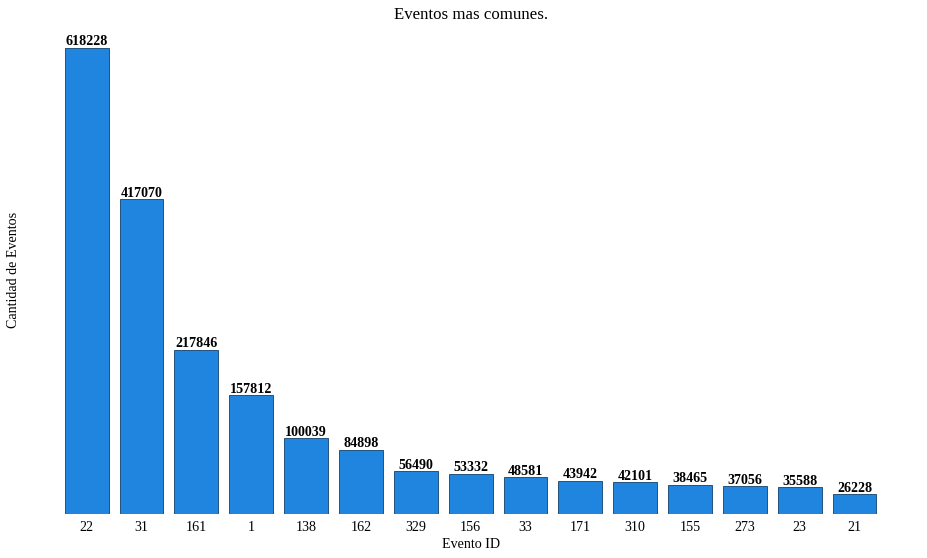

In [62]:
tox=toplot.event_id.tolist()
height = toplot.events_count.tolist()
fig, ax = plt.subplots(figsize=(16,9))
rects1 = ax.bar(tox, height , color='#1F85DE',edgecolor='#265680', align='center')
#### titulos
ax.set_title('Eventos mas comunes.')
ax.set_ylabel('Cantidad de Eventos')
ax.set_xlabel('Evento ID')
ax.set_yticks([])
####
autolabel(rects1)
removeSpines(ax)
### aplico la funcion autolabel para poner la cantidad sobre cada barra
### se remueven los bordes
plt.show()

#### Hay eventos que tienden a concentrarse en pocas IPs 

In [381]:
toplot = events[['event_id','ip_address','date']].groupby(['event_id','ip_address']).agg('count')

In [382]:
toplot = toplot.sort_values(by='date',ascending=False).reset_index()
toplot.columns = ['event_id','ip_address','event_count']
toplot['event_id'] = toplot['event_id'].astype('str')
#### se cuenta la cantidad de veces que un tipo de evento se dispara 
#### muchas veces desde una misma ip
over300forIP = toplot.loc[toplot['event_count']>300]
over200forIP = toplot.loc[toplot['event_count']>200]
over100forIP = toplot.loc[toplot['event_count']>100]

In [383]:
over300forIP = over300forIP[['event_id','event_count']].groupby('event_id').agg(['count']).reset_index()
over300forIP.columns = ['event_id','over300forIP']
over300forIP = over300forIP.sort_values(by='over300forIP',ascending=False)[0:20]
over200forIP = over200forIP[['event_id','event_count']].groupby('event_id').agg(['count']).reset_index()
over200forIP.columns = ['event_id','over200forIP']
over200forIP = over200forIP.sort_values(by='over200forIP',ascending=False)[0:20]
over100forIP = over100forIP[['event_id','event_count']].groupby('event_id').agg(['count']).reset_index()
over100forIP.columns = ['event_id','over100forIP']
over100forIP = over100forIP.sort_values(by='over100forIP',ascending=False)[0:20]

In [391]:
dum = pd.merge(over100forIP,over200forIP,how='outer',on='event_id')
dum = pd.merge(dum,over300forIP,how='outer',on='event_id')[0:10]

In [392]:
dum

,event_id,over100forIP,over200forIP,over300forIP
0,22,342.0,162.0,101.0
1,138,148.0,77.0,51.0
2,33,106.0,38.0,14.0
3,23,65.0,19.0,6.0
4,171,63.0,27.0,17.0
5,273,56.0,28.0,16.0
6,98,39.0,22.0,12.0
7,21,36.0,6.0,2.0
8,272,35.0,12.0,9.0
9,31,24.0,8.0,3.0


In [ ]:
tox=toplot.event_id.tolist()
height = toplot.events_count.tolist()
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(tox, height , color='#1F85DE',edgecolor='#265680', align='center')
#### titulos
ax.set_title('Eventos mas comunes.')
ax.set_ylabel('Cantidad de Eventos')
ax.set_xlabel('Evento ID')
ax.set_yticks([])
####
autolabel(rects1)
removeSpines(ax)
### aplico la funcion autolabel para poner la cantidad sobre cada barra
### se remueven los bordes
plt.show()

In [51]:
events.date.min(), events.date.max()

(Timestamp('2019-03-05 00:00:00.255000'),
 Timestamp('2019-03-13 23:59:59.984000'))

In [ ]:
events['hour'] = events.date.dt.hour
events['day'] = events.date.dt.day

In [102]:
clicks.loc[clicks.touchY<=1].touchY

Series([], Name: touchX, dtype: float64)

/home/pcsor/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


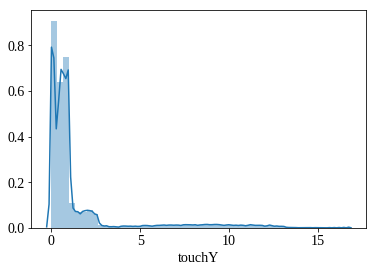

In [106]:
sns.distplot(clicks.touchY.dropna())

/home/pcsor/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


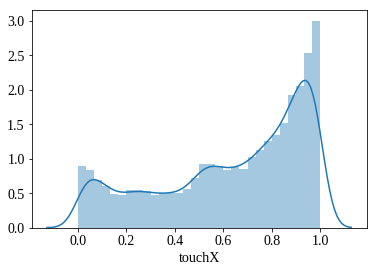

In [107]:
sns.distplot(clicks.touchX.dropna());

In [87]:
clicks.touchX = clicks.touchX.apply(lambda x: round(x,1))
clicks.touchY = clicks.touchY.apply(lambda x: round(x,1))

In [90]:
toplot = clicks.groupby(['touchX','touchY']).agg('count')\
    .reset_index()[['touchX','touchY','advertiser_id']].sort_values(by='advertiser_id',ascending=False)

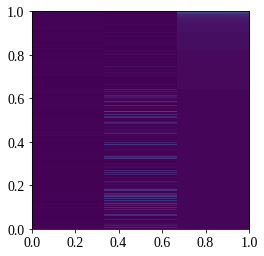

In [94]:
plt.imshow(toplot,extent=[0,1,0,1])

In [95]:
toplot.touchY.max()

16.6

In [75]:
clicks.groupby(['touchX','touchY']).agg('count').reset_index()[['touchX','touchY','advertiser_id']].sort_values(by='advertiser_id',ascending=False)

,touchX,touchY,advertiser_id
21817,0.996,0.060,7
21800,0.996,0.035,6
21828,0.996,0.077,6
19656,0.957,0.055,6
3645,0.250,3.954,5
21831,0.996,0.085,5
16839,0.898,0.023,5
21808,0.996,0.048,5
21501,0.992,0.089,4
21834,0.996,0.091,4
